In [236]:
#importing libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from math import sqrt
import math
import scipy.stats as stats
import statistics as st
import csv
import seaborn as sns

In [237]:
#importing data

dane = pd.read_excel(r'/content/dane_platki.xlsx', sheet_name = 'Dane_oryginalne')
list_of_columns = []
for column in dane.columns:
    list_of_columns.append(column)

In [238]:
#basic statistics

def minimum_element(list_of_columns,dane):

    MIN = {}
    for element in list_of_columns[1:]:
        minimum = dane[element].min()  
        MIN[element] = minimum
    return MIN
        
def maximum_element(list_of_columns,dane):

    MAX = {}   
    for element in list_of_columns[1:]:
        maximum = dane[element].max()
        MAX[element] = maximum        
    return MAX  


def min_max(list_of_columns,dane):

    min_max_dict = {}    
    for element in list_of_columns[1:]:
        stosunek = MIN[element]/MAX[element]
        min_max_dict[element] = stosunek        
    return min_max_dict 

def r(list_of_columns,MAX,MIN):  

    r = {}   
    for element in list_of_columns[1:]:
        ratio = MAX[element] - MIN[element]
        r[element] = ratio   
    return r
          
def d(list_of_columns,MAX,MIN):   

    d = {}    
    for element in list_of_columns[1:]:
        mid_range = (MAX[element] + MIN[element])/2
        d[element] = mid_range  
    return d
    
    
def arithmetic_average(list_of_columns):
    
    dict_mean = {}
    for element in list_of_columns[1:]:
        mean = dane[element].mean()
        dict_mean[element] = mean
        
    return dict_mean


def standard_deviation(list_of_columns,dane,av): 

    std_dict = {}
    index = 0
    suma = 0      

    for element in list_of_columns[1:]:
        while index != 30:    
            suma += (dane[element][index] - av[element]) **2
            index += 1      
        std_dict[element] = sqrt(suma / len(dane[element]))
        index = 0
        suma = 0    

    return std_dict

def skew_q(stdevp,av):  

    skew_dict = {}
    q = 0   
    for element in list_of_columns[1:]:
        q = (3 * (av[element] - dane[element].median())) / stdevp[element]
        skew_dict[element] = q   
        
    return skew_dict
        
MIN = minimum_element(list_of_columns,dane)
MAX = maximum_element(list_of_columns,dane)
ratio = min_max(list_of_columns,dane)
range_max_min = r(list_of_columns,MAX,MIN)   
mid_range = d(list_of_columns,MAX,MIN)
av = arithmetic_average(list_of_columns)
stdevp = standard_deviation(list_of_columns,dane,av)
skew_q = skew_q(stdevp,av)

In [239]:
#tests

def test_1(ratio):
    for value in ratio.values():
        if value > 0.1:
            print(True)
        else:
            print(False)
            
def test_2(mid_range,stdevp,av,list_of_columns):   
    for element in list_of_columns[1:]:
        if abs(mid_range[element]-av[element]) < stdevp[element]:
            print(True)
        else:
            print(False)
            
def test_3(range_max_min,stdevp,list_of_columns):
     for element in list_of_columns[1:]:
            if 3 < range_max_min[element]/stdevp[element] < 5:
                print(True)
            else:
                print(False)
    
def test_4(list_of_columns): 
    for element in list_of_columns[1:]:
        if abs(stats.skew(dane[element])) < 2:
            print(True)
        else:
            print(False)

In [240]:
test_1(ratio)
print('---')
test_2(mid_range,stdevp,av,list_of_columns)
print('---')
test_3(range_max_min,stdevp,list_of_columns)
print('---')
test_4(list_of_columns)

#variables 2,3,4,5,7 failed tests

True
True
False
False
False
True
False
---
True
False
True
True
True
True
True
---
True
True
True
True
True
True
True
---
True
True
True
True
True
True
True


In [241]:
def test_shapiro_method(list_of_columns):
  
  for element in list_of_columns[1:]:
    w,p = stats.shapiro(dane[element])  
    print(p)
    if p >= 0.05:
      print(f'rozkład normalny: {element}')
    else:
      print(f'rozkład odbiegający od normalnego: {element}')

test_shapiro_method(list_of_columns)

0.0006038510473445058
rozkład odbiegający od normalnego: calories
4.57543610536959e-05
rozkład odbiegający od normalnego: protein
0.00010863716306630522
rozkład odbiegający od normalnego: fat
0.5132350325584412
rozkład normalny: sodium
0.0006177242612466216
rozkład odbiegający od normalnego: fiber
0.001750053372234106
rozkład odbiegający od normalnego: carbo
0.1641124039888382
rozkład normalny: sugars


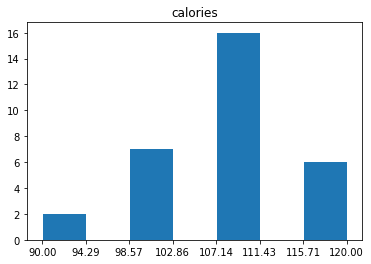

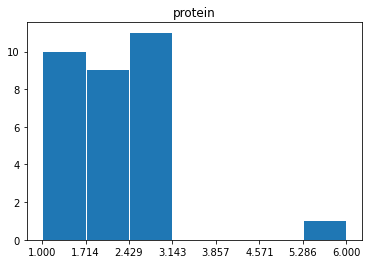

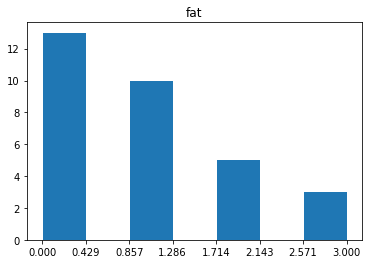

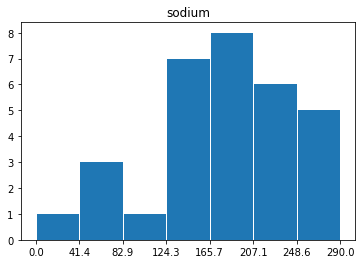

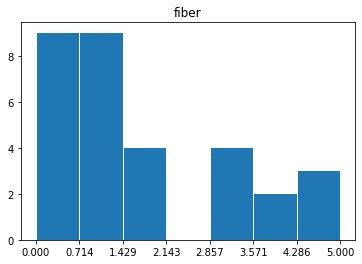

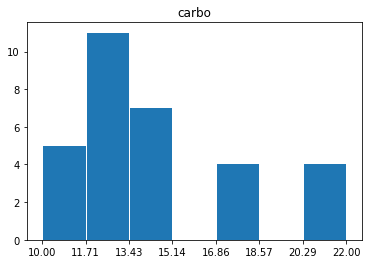

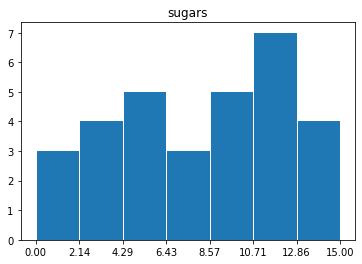

In [242]:
#histograms

def histogramy(dane,list_of_columns):
  for element in list_of_columns[1:]:
    N = dane.shape[0]
    n,bins,patches = plt.hist(dane[element],bins = round(N/4)-1)
    plt.xticks(bins)
    plt.grid(color = 'white', lw = 1, axis = 'x')
    plt.title(element)
    plt.plot()
    plt.show()

histogramy(dane,list_of_columns)

In [243]:
def adding_elements_to_list(dane,name_of_columns):
    lista = []
    for element in dane[name_of_columns]:
      lista.append(element)

    return lista

In [244]:
calories = adding_elements_to_list(dane,'calories')
protein = adding_elements_to_list(dane,'protein')
fat = adding_elements_to_list(dane,'fat')
sodium = adding_elements_to_list(dane,'sodium')
fiber = adding_elements_to_list(dane,'fiber')
carbo = adding_elements_to_list(dane,'carbo')
sugars = adding_elements_to_list(dane,'sugars')

def statistics(list_of_columns):
    rows = []

    for element in list_of_columns[1:]:

        dictionary = {'element':element,
        'min':dane[element].min(),
        'max':dane[element].max(),
        'median':dane[element].median(),
        'mean':dane[element].mean(),
        'quantile1':dane[element].quantile(0.25),
        'quantile3':dane[element].quantile(0.75)}

        rows.append(dictionary) 

    return rows


#save to CSV
rows = statistics(list_of_columns)
fieldnames = ['element','min','max','median','mean','quantile1','quantile3']
with open(r'dane_csv.csv', 'w', encoding='UTF8', newline='') as f:
       writer = csv.DictWriter(f, fieldnames=fieldnames)
       writer.writeheader()
       writer.writerows(rows)

In [246]:
#transforming function log10(x)

def transform1(dane):
  dane_transformowane = []
  for element in dane:
    if element == 0:
      dane_transformowane.append(element)
    else:
      dane_transformowane.append(math.log10(element))

  return dane_transformowane

In [247]:
#transforming function log10(a-x)

def transform2(dane,a):
  dane_transformowane = []
  for element in dane:
    if element == 0:
      dane_transformowane.append(element)
    else:
      dane_transformowane.append(math.log10(a-element))

  return dane_transformowane


In [248]:
#transforming function log10(x/(a-x))

def transform3(dane,a):
  dane_transformowane = []
  for element in dane:
    if element == 0:
      dane_transformowane.append(element)
    else:
      dane_transformowane.append(math.log10(element/(a-element)))

  return dane_transformowane


In [249]:
#transforming function log10(x/(a-x))

def transform4(dane):
  dane_transformowane = []
  for element in dane:
      if element == 0:
         dane_transformowane.append(element)
      else:
         dane_transformowane.append(1/element)

  return dane_transformowane

In [250]:
def find_mode(xs):
	return max(set(xs), key=xs.count)

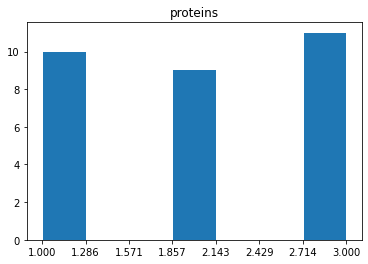

2.033333333333333
0.8502873077655143


(0.2943257314913035, 3.7723409351753627)

In [251]:
#removing an outlier in protein:

N = dane.shape[0]
n,bins,patches = plt.hist(protein[0:3] + protein[4:],bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('proteins')
plt.plot()
plt.show()

#symmetrical graph

m = st.mean(protein[0:3] + protein[4:])
print(m)
s = st.stdev(protein[0:3] + protein[4:])
print(s)
len(protein[0:3] + protein[4:])

xmin = m-(2.0452)*s
xmax = m+(2.0452)*s

(xmin,xmax)

#value deletion

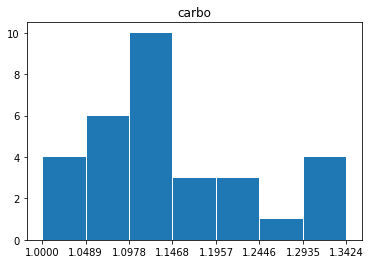

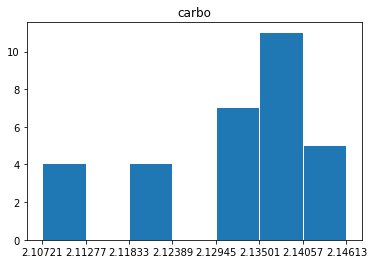

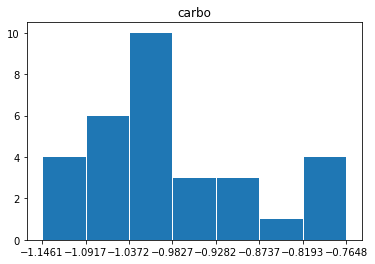

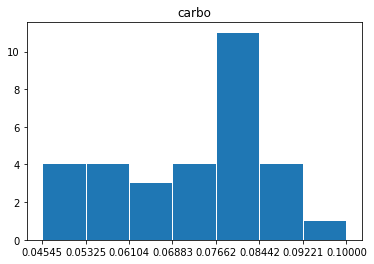

In [257]:
N = dane.shape[0]
n,bins,patches = plt.hist(transform1(carbo),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('carbo')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform2(carbo,150),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('carbo')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform3(carbo,150),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('carbo')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform4(carbo),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('carbo')
plt.plot()
plt.show()

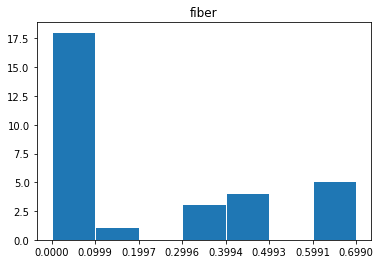

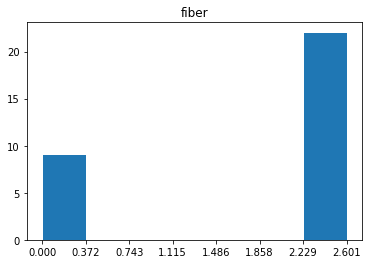

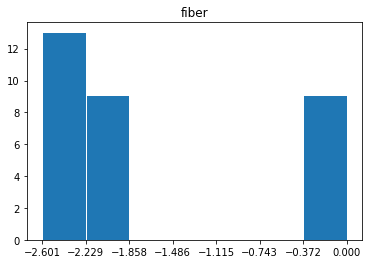

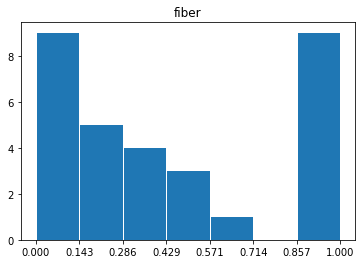

In [258]:
N = dane.shape[0]
n,bins,patches = plt.hist(transform1(fiber),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('fiber')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform2(fiber,400),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('fiber')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform3(fiber,400),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('fiber')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform4(fiber),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('fiber')
plt.plot()
plt.show()

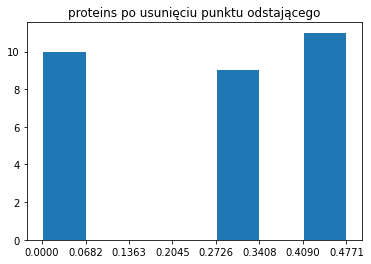

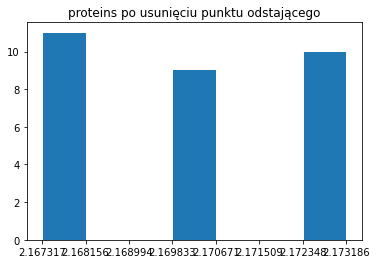

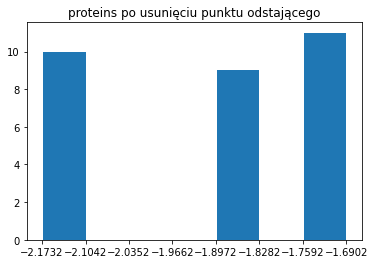

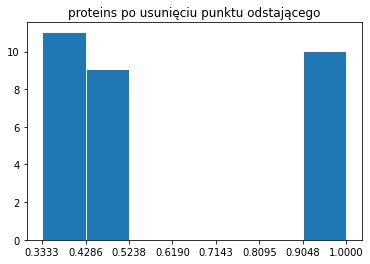

In [259]:
protein[0:3] + protein[4:]

N = dane.shape[0]
n,bins,patches = plt.hist(transform1(protein[0:3] + protein[4:]),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('proteins po usunięciu punktu odstającego')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform2(protein[0:3] + protein[4:],150),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('proteins po usunięciu punktu odstającego')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform3(protein[0:3] + protein[4:],150),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('proteins po usunięciu punktu odstającego')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform4(protein[0:3] + protein[4:]),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('proteins po usunięciu punktu odstającego')
plt.plot()
plt.show()

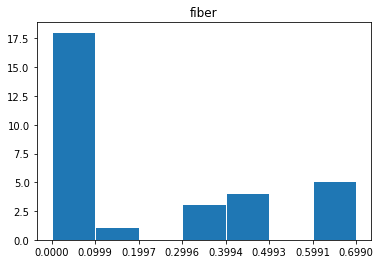

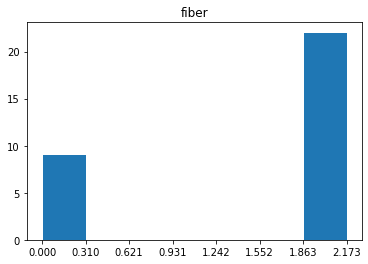

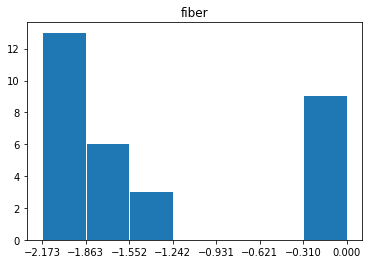

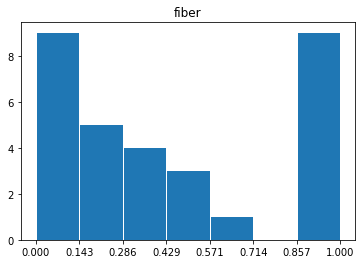

In [260]:
N = dane.shape[0]
n,bins,patches = plt.hist(transform1(fiber),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('fiber')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform2(fiber,150),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('fiber')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform3(fiber,150),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('fiber')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform4(fiber),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('fiber')
plt.plot()
plt.show()

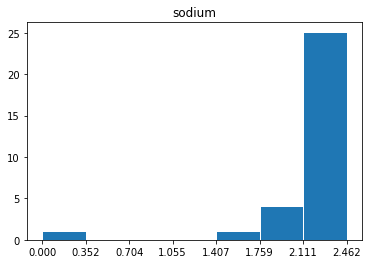

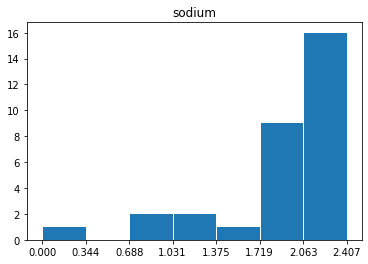

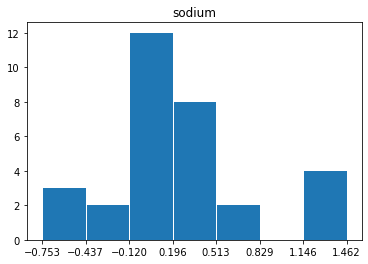

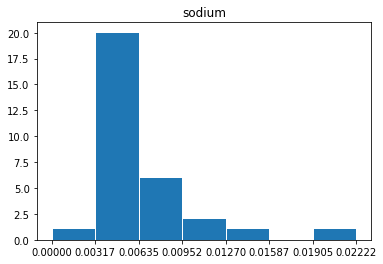

In [261]:
N = dane.shape[0]
n,bins,patches = plt.hist(transform1(sodium),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('sodium')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform2(sodium,300),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('sodium')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform3(sodium,300),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('sodium')
plt.plot()
plt.show()

N = dane.shape[0]
n,bins,patches = plt.hist(transform4(sodium),bins = round(N/4)-1)
plt.xticks(bins)
plt.grid(color = 'white', lw = 1, axis = 'x')
plt.title('sodium')
plt.plot()
plt.show()

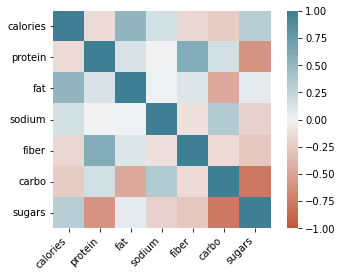

In [262]:
corr = dane.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

          calories   protein       fat     fiber     carbo    sugars
calories  1.000000 -0.155117  0.516178 -0.165818 -0.231855  0.314673
protein  -0.155117  1.000000  0.131463  0.595709  0.177784 -0.582014
fat       0.516178  0.131463  1.000000  0.108412 -0.467190  0.064485
fiber    -0.165818  0.595709  0.108412  1.000000 -0.148982 -0.258770
carbo    -0.231855  0.177784 -0.467190 -0.148982  1.000000 -0.768411
sugars    0.314673 -0.582014  0.064485 -0.258770 -0.768411  1.000000


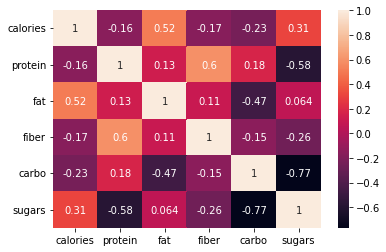

In [263]:
df = pd.DataFrame(dane,columns = ['calories','protein','fat','fiber','carbo','sugars'])
corrMatrix = df.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [264]:
df

,calories,protein,fat,fiber,carbo,sugars
0,90,2,1,4.0,15.0,6
1,90,3,0,5.0,13.0,5
2,120,1,2,0.0,12.0,12
3,110,6,2,2.0,17.0,1
4,120,1,3,0.0,13.0,9
5,110,3,2,2.0,13.0,7
6,110,1,1,0.0,12.0,13
7,110,2,0,0.0,22.0,3
8,100,2,0,1.0,21.0,2
9,110,1,0,1.0,13.0,12


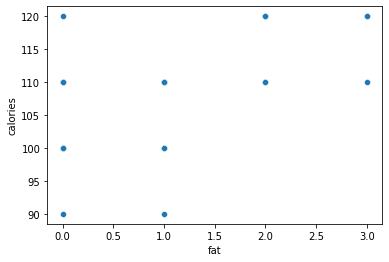

In [265]:
sns.scatterplot(x='fat', y='calories', data=dane)

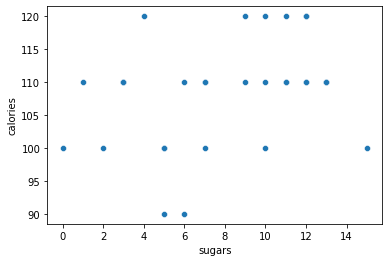

In [266]:
sns.scatterplot(x='sugars', y='calories', data=dane)

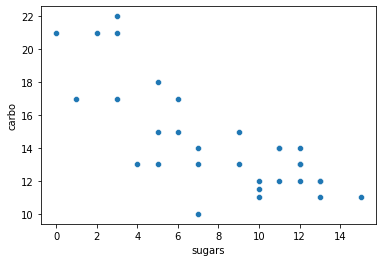

In [267]:
sns.scatterplot(x='sugars', y='carbo', data=dane)

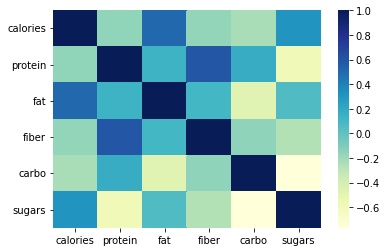

In [268]:
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu")

In [269]:
corrMatrix = df.corr()
corrMatrix

,calories,protein,fat,fiber,carbo,sugars
calories,1.000000,-0.155117,0.516178,-0.165818,-0.231855,0.314673
protein,-0.155117,1.000000,0.131463,0.595709,0.177784,-0.582014
fat,0.516178,0.131463,1.000000,0.108412,-0.467190,0.064485
fiber,-0.165818,0.595709,0.108412,1.000000,-0.148982,-0.258770
carbo,-0.231855,0.177784,-0.467190,-0.148982,1.000000,-0.768411
sugars,0.314673,-0.582014,0.064485,-0.258770,-0.768411,1.000000


In [270]:
from openpyxl import load_workbook
 
wb = load_workbook('dane_platki.xlsx')
 
sheet = sheet = wb.get_sheet_by_name("Dane_transformowane")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """


In [271]:
#FUNCTIONS TO SAVE THE TRANSFORMED DATA TO THE SAME FILE BUT A DIFFERENT SHEET

In [272]:
transform_sodium = transform3(sodium,300)

def tr_sod(dane):
  
  wiersz = 2
  now = 'B' + str(wiersz)
  for element in transform_sodium:
      sheet[now] = element
      wiersz += 1
      now = 'B' + str(wiersz)

#tr_sod(transform_sodium)

In [273]:
transform_carbo = transform4(carbo)

def tr_carbo(dane):
  
  wiersz = 2
  now = 'C' + str(wiersz)
  print(now)
  for element in transform_carbo:
      sheet[now] = element
      wiersz += 1
      now = 'C' + str(wiersz)


#tr_carbo(transform_carbo)

C2


In [274]:
#wb.save("dane_platki.xlsx")